In [1]:
!pip install thermobar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

In [3]:
out=pt.import_excel('ASW31,35,30,33,34_Pop1+2_Cpx Real.xlsx', sheet_name="Pop1_asw33")
my_input=out['my_input']
Liqs=out['Liqs']
Cpxs=out['Cpxs']

In [4]:
display(Liqs.head())
display(Cpxs.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,59.48,1.076,19.31,5.34,0.11,3.32,6.8,4.57,0.0,0.008,0.23,0.0,0.0,0.0,0.0,0.0,0
1,59.48,1.076,19.31,5.34,0.11,3.32,6.8,4.57,0.0,0.008,0.23,0.0,0.0,0.0,0.0,0.0,1
2,59.48,1.076,19.31,5.34,0.11,3.32,6.8,4.57,0.0,0.008,0.23,0.0,0.0,0.0,0.0,0.0,2
3,59.48,1.076,19.31,5.34,0.11,3.32,6.8,4.57,0.0,0.008,0.23,0.0,0.0,0.0,0.0,0.0,3
4,59.48,1.076,19.31,5.34,0.11,3.32,6.8,4.57,0.0,0.008,0.23,0.0,0.0,0.0,0.0,0.0,4


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.25,0.57,3.73,6.13,0.17,16.20,21.19,0.35,0.0,0.43,0
1,51.94,0.66,4.95,7.38,0.11,16.14,18.14,0.27,0.0,0.41,1
2,52.04,0.46,3.05,6.59,0.20,16.76,20.38,0.31,0.0,0.21,2
3,51.27,0.78,4.27,7.53,0.21,16.74,18.72,0.34,0.0,0.13,3
4,51.82,0.57,3.53,6.43,0.11,16.33,20.23,0.35,0.0,0.63,4


In [5]:
help(pt.calculate_cpx_liq_press)

Help on function calculate_cpx_liq_press in module Thermobar.clinopyroxene_thermobarometry:

calculate_cpx_liq_press(*, equationP, cpx_comps=None, liq_comps=None, meltmatch=None, T=None, eq_tests=False, Fe3Fet_Liq=None, H2O_Liq=None, sigma=1, Kd_Err=0.03)
    Clinopyroxene-Liquid barometer, calculates pressure in kbar
    (and equilibrium tests as an option)
    
    Parameters
    -------
    
    cpx_comps: pandas.DataFrame
        Clinopyroxene compositions with column headings SiO2_Cpx, MgO_Cpx etc.
    
    liq_comps: pandas.DataFrame
        Liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
    
    EquationP: str
        choose from:
    
        |  P_Put1996_eqP1 (T-dep, H2O-indep)
        |  P_Mas2013_eqPalk1 (T-dep, H2O-indep, alk adaption of P1)
        |  P_Put1996_eqP2 (T-dep, H2O-indep)
        |  P_Mas2013_eqPalk2 (T-dep, H2O-indep, alk adaption of P2)
        |  P_Put2003 ((T-dep, H2O-indep)
        |  P_Neave2017 (T-dep, H2O-indep)
        |  P_Put2008_eq

In [6]:
help(pt.P_Neave2017)

Help on function P_Neave2017 in module Thermobar.clinopyroxene_thermobarometry:

P_Neave2017(T, *, lnK_Jd_liq, DiHd_2003, Al_Liq_cat_frac, Na_Liq_cat_frac, K_Liq_cat_frac)
    Clinopyroxene-liquid barometer of Neave and Putirka (2017)
    :cite:`neave2017new`
    
    SEE=+-1.4 kbar



In [7]:
PT_iter_Neave_33=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpxs, liq_comps=Liqs, equationP="P_Neave2017", equationT="T_Put2008_eq33")
PT_iter_Neave_33

,P_kbar_calc,T_K_calc
0,2.311838,1350.710540
1,1.914219,1362.642429
2,1.756357,1351.065234
3,2.911317,1371.615922
4,2.563030,1358.229457
5,7.601231,1427.368448
6,10.573448,1471.832859
7,6.981347,1422.536018
8,6.719923,1418.309380


Text(0, 0.5, 'T (K)')

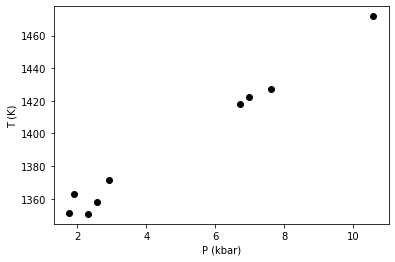

In [8]:
plt.plot(PT_iter_Neave_33['P_kbar_calc'], PT_iter_Neave_33['T_K_calc'], 'ok')
plt.xlabel('P (kbar)')
plt.ylabel('T (K)')

In [10]:
# First, make a copy
my_input_CPX1=my_input.copy()
# Insert a new column, position, column name, then variable name you want to append.
my_input_CPX1['P_Neave2017']=PT_iter_Neave_33['P_kbar_calc']
my_input_CPX1['T_Put2008_eq33']=PT_iter_Neave_33['T_K_calc']
# Save to an Excel sheet called "Calc1" using the pandas to excel function
my_input_CPX1.to_excel('CPX_Calc_asw33_pop1newest.xlsx')